In [21]:
import cv2
import numpy as np
from tiffConverter import convert_to_numpy, convert_to_tiff
import matplotlib.pyplot as plt

In [22]:
aligned_proj_location = "alignedProjections/aligned_foamTomo20240731-115419.tif"
kevinProjections, kevin_proj_scale_info = convert_to_numpy(aligned_proj_location)

In [23]:
def edge_contrast_score(image):
    if image.dtype != np.uint8:
        # Normalize the image to the range [0, 255] and convert to uint8
        image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
        image = image.astype(np.uint8)
        
    # Edge detection using Canny
    edges = cv2.Canny(image, 100, 200)
    
    # Calculate edge score (e.g., the mean value of edges)
    edge_score = np.mean(edges)
    
    # Calculate contrast score (standard deviation of pixel intensities)
    contrast_score = np.std(image)
    
    # Combine the scores
    total_score = edge_score + contrast_score
    
    return total_score, edge_score, contrast_score

In [24]:
scoreValues = []
for i in range(kevinProjections.shape[0]):
    scoreValues.append(edge_contrast_score(kevinProjections[i])[0])

percentile10 = np.percentile(scoreValues, 10)
print(percentile10)

7.471306750521609


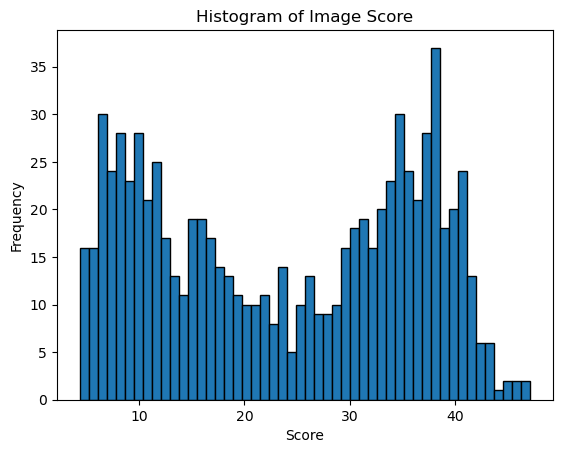

In [25]:
# Create a histogram
plt.hist(scoreValues, bins=50, edgecolor='black', log=False)  # 'bins' defines the number of bins in the histogram

# Add labels and title
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Image Score')

# Show the plot
plt.show()

In [26]:
angles = np.arange(0.45, 360.45, 0.45).tolist()
scoreValuesCopy = scoreValues.copy()
kevinProjectionsCopy = kevinProjections.copy().tolist()

runsToRemove = []
for i in range(800):
    if scoreValues[i] < percentile10:
        runsToRemove.append(i)

runsToRemove.reverse()

In [27]:
for indx in runsToRemove:
    scoreValuesCopy.pop(indx)
    kevinProjectionsCopy.pop(indx)
    angles.pop(indx)

print(len(angles))
print(len(kevinProjections))

720
800


In [28]:
convert_to_tiff(np.array(kevinProjectionsCopy), "/Users/levih/Desktop/TomoMono/data/TomoReconstructions90p.tif")
np.save('/Users/levih/Desktop/TomoMono/data/angles_90p.npy', angles)


In [29]:
import tomopy
ang = tomopy.angles(20, 0, 360)
print(ang)
print(type(ang))
new = np.load('/Users/levih/Desktop/TomoMono/data/angles_90p.npy')
print(type(new))
print(len(new))
print(new)


[0.         0.33069396 0.66138793 0.99208189 1.32277585 1.65346982
 1.98416378 2.31485774 2.64555171 2.97624567 3.30693964 3.6376336
 3.96832756 4.29902153 4.62971549 4.96040945 5.29110342 5.62179738
 5.95249134 6.28318531]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
720
[  0.45   0.9    1.35   1.8    2.7    3.15   3.6    4.05   4.5    5.4
   5.85   6.3    6.75   7.2    7.65   8.1    8.55   9.     9.9   10.35
  10.8   11.25  11.7   12.15  12.6   13.05  13.5   13.95  14.4   15.3
  15.75  16.2   16.65  17.1   17.55  18.    18.45  18.9   19.35  19.8
  20.25  20.7   21.6   22.05  22.5   22.95  23.4   23.85  24.3   24.75
  25.2   25.65  26.1   26.55  27.    27.45  27.9   28.35  28.8   29.7
  30.6   31.05  31.5   32.4   33.3   33.75  34.2   34.65  35.1   35.55
  36.    36.45  36.9   37.35  37.8   38.25  38.7   39.15  39.6   40.05
  40.5   40.95  41.4   42.3   42.75  43.2   43.65  44.1   44.55  45.
  45.45  45.9   46.35  46.8   47.25  47.7   48.15  48.6   49.05  49.5
  49.95  50.4   50.85